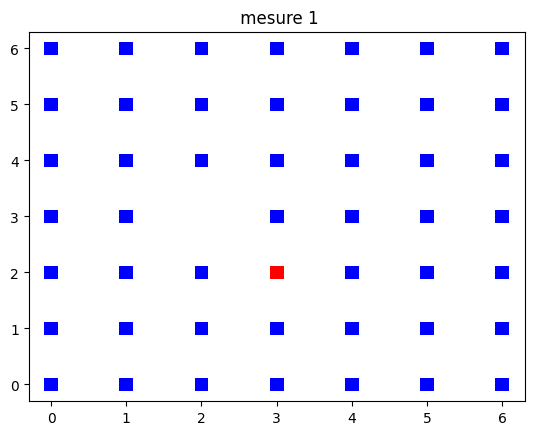

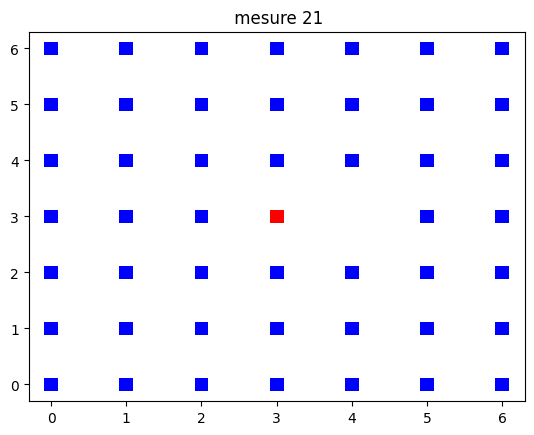

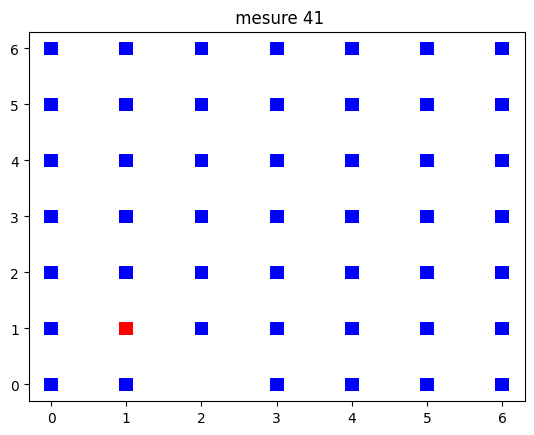

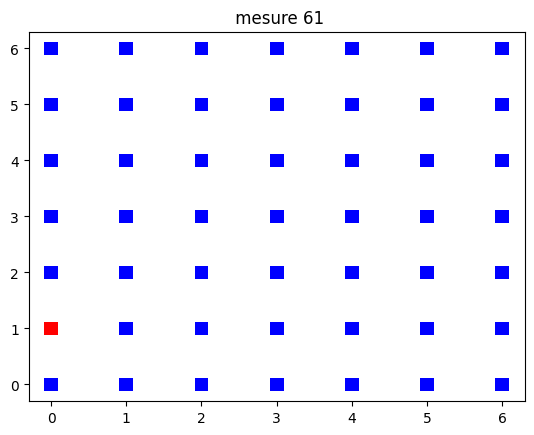

In [3]:
import numpy as np
import matplotlib.pyplot as plt


n = 7
timesteps = 8


lattice = np.zeros((n, n))
center = (n//2, n//2)
radius = 8
for i in range(n):
    for j in range(n):
        if np.sqrt((i-center[0])**2 + (j-center[1])**2) <= radius:
            lattice[i,j] = 1


x, y = center
lattice[x, y] = -1


colors = np.where(lattice == 1, 'blue', 'white')
colors[x, y] = 'red'

vacancy_pos = None

for t in range(timesteps):

    dx, dy = np.random.choice([-1, 0, 1], 2)
    
    # Check if the new position is valid
    if 0 <= x+dx < n and 0 <= y+dy < n:
        if lattice[x+dx, y+dy] == 1:

            lattice[x, y] = 1
            x, y = x+dx, y+dy
            if vacancy_pos is None:
                neighbors = []
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        if (i, j) != (0, 0) and 0 <= x+i < n and 0 <= y+j < n and lattice[x+i, y+j] == 1:
                            neighbors.append((i, j))
                if neighbors:
                    dx_vac, dy_vac = neighbors[np.random.randint(len(neighbors))]
                    vacancy_pos = (x+dx_vac, y+dy_vac)
                    lattice[vacancy_pos[0], vacancy_pos[1]] = 0
            else:
                x_vac, y_vac = vacancy_pos
                lattice[x_vac, y_vac] = 1
                vacancy_pos = None
        elif np.random.random() < 0.8:
          
            if vacancy_pos is None:
                neighbors = []
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        if (i, j) != (0, 0) and 0 <= x+i < n and 0 <= y+j < n and lattice[x+i, y+j] == 1:
                            neighbors.append((i, j))
                if neighbors:
                    dx_vac, dy_vac = neighbors[np.random.randint(len(neighbors))]
                    vacancy_pos = (x+dx_vac, y+dy_vac)
                    lattice[vacancy_pos[0], vacancy_pos[1]] = 0
            x, y = x+dx, y+dy
    

    colors = np.where(lattice == 1, 'blue', 'white')
    colors[x, y] = 'red'
    if t % 2 == 0:

        plt.scatter(*np.indices((n, n)), marker='s', edgecolors='none',
        c=colors.flatten(), s=100)
        plt.title(f" mesure {t*10+1}")
        plt.show()


La distance entre le point de départ et le point d arrivée est 47.34.
La vitesse de la particule est 593.89 m/s.


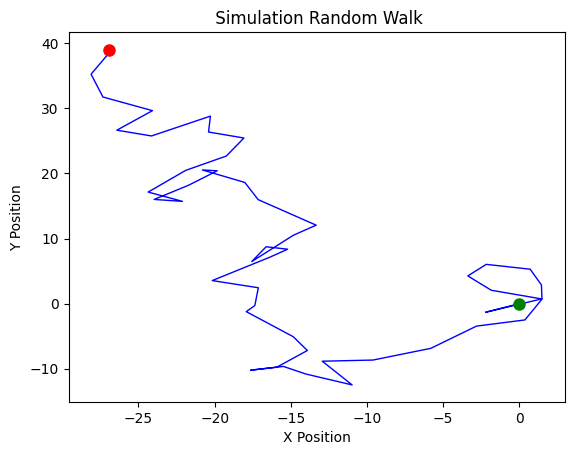

In [10]:
import random
import matplotlib.pyplot as plt
import math

f=0.1 #facteur de corrélation

k_B = 1.38e-23 
T = 300  
M_w = 18e-3 
N = 6.022e23  


v = math.sqrt(8 * k_B * T / (math.pi * M_w / N))

dt = 0.1 
n = 50  

step_size = v * dt * f / math.sqrt(2)

x = 0
y = 0

path_x = [x]
path_y = [y]

for i in range(n):
    dx = random.uniform(-1, 1) * step_size
    dy = random.uniform(-1, 1) * step_size
    x += dx
    y += dy
    path_x.append(x)
    path_y.append(y)


distance = ((x - 0) ** 2 + (y - 0) ** 2) ** 0.5


print(f"La distance entre le point de départ et le point d arrivée est {distance:.2f}.")
print(f"La vitesse de la particule est {v:.2f} m/s.")


plt.plot(path_x, path_y, 'b-', linewidth=1.0)
plt.plot(0, 0, 'go', markersize=8.0)
plt.plot(x, y, 'ro', markersize=8.0)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(' Simulation Random Walk')
plt.show()